#Comparative Analysis and Visualization of AI Scholarly Publications



##Introduction

The goal of this project is to meticulously analyze and understand the global trends and patterns in the field of artificial intelligence (AI), an area that is increasingly at the forefront of technological advancements. By recognizing the growing need for detailed insights into AI-related research and applications, our project has been meticulously designed to provide an in-depth examination of AI-related data. The analysis is split into two crucial components: SQL and Python, each serving a unique purpose in achieving the objectives of the project.

SQL Part:
The SQL section focuses on creating a well-structured database and conducting a comprehensive investigation into AI publications. By creating specific tables, we can organize general publication information and AI-related details separately. The aim here is not only to collect and organize the data but also to ensure its quality and integrity. Furthermore, an in-depth analysis of the contributions of Chinese authors in AI publications adds a geographical dimension to our exploration, helping us understand China's role in the global AI landscape.

Python Part:
Shifting from the realm of publications to practical applications, the Python part of the project dives into a synthetic dataset containing scores from an AI-related test conducted by researchers across five countries. Through mathematical computations, we derive insightful statistics, summarizing the test scores both numerically and visually. The use of histograms and heatmaps helps in presenting a clear picture of the average performance of the participating countries.

Together, the SQL and Python segments form a multifaceted analysis of AI-related data. By employing a combination of database management, statistical calculations, and data visualization, the project aims to shed light on various aspects of the rapidly evolving field of AI. The insights gained from this study will contribute to our understanding of global participation in AI research and innovation, facilitating further advancements and collaborations.

##Libraries and Settings

In [ ]:
import sqlite3
import pandas as pd
!pip install gdown
import gdown
import seaborn as sns
import matplotlib.pyplot as plt

##SQL

####The first table, xxxx_publications_corpus, has one row for every publication in the dataset.

In [ ]:
# Create the table structure

conn = sqlite3.connect('xxxx_publications_corpus.db')
cur = conn.cursor()
cur.execute('''
    DROP TABLE IF EXISTS xxxx_publications_corpus
''')
cur.execute('''
CREATE TABLE xxxx_publications_corpus (
    id TEXT PRIMARY KEY,
    year INTEGER,
    title TEXT,
    abstract TEXT,
    concepts TEXT);
''')

# Prepare data for insertion
data = [
    ('pub.1031529730', 1967, 'Temporal Lobe Epilepsy: A…', 'Temporal lobe epilepsy an…', 'patients;geniculate body;…'),
    ('pub.1067445552', 2016, 'A fingerprint-based hybri…', '', 'fingerprints…'),
    ('pub.1019474067', 2017, 'Invasive crayfish impacts…', 'Assessing the impacts of …', 'large chub;different life…'),
    ('pub.1121166619', 1995, 'An outline of the tectoni…', '', 'tectonic evolution;evolut…'),
    ('pub.1098674472', 1999, 'Model predictive control:…', '', 'predictive control;challe…'),
    ('pub.1114794884', 2014, 'The Effects of Substrate …', 'La-doped lead zirconate t…', 'properties;fabrication;pl…'),
    ('pub.1031540560', 1932, 'La Tuberculose au Danemar…', '', ''),
]

# Insert the data into our table
cur.executemany('''
    INSERT INTO xxxx_publications_corpus (id, year, title, abstract, concepts)
    VALUES (?, ?, ?, ?, ?);
''', data)

# Commit changes and close connection
conn.commit()
cur.execute("SELECT * FROM xxxx_publications_corpus")
print(cur.fetchall())
conn.close()

[('pub.1031529730', 1967, 'Temporal Lobe Epilepsy: A…', 'Temporal lobe epilepsy an…', 'patients;geniculate body;…'), ('pub.1067445552', 2016, 'A fingerprint-based hybri…', '', 'fingerprints…'), ('pub.1019474067', 2017, 'Invasive crayfish impacts…', 'Assessing the impacts of …', 'large chub;different life…'), ('pub.1121166619', 1995, 'An outline of the tectoni…', '', 'tectonic evolution;evolut…'), ('pub.1098674472', 1999, 'Model predictive control:…', '', 'predictive control;challe…'), ('pub.1114794884', 2014, 'The Effects of Substrate …', 'La-doped lead zirconate t…', 'properties;fabrication;pl…'), ('pub.1031540560', 1932, 'La Tuberculose au Danemar…', '', '')]


####The second table, xxxx_pred_ai_publications, contains the organizational affiliations of authors of publications from the first table that are related to artificial intelligence (AI). In this table, a single publication will have a unique row for every affiliation disclosed by the authors.

In [ ]:
# Create the table structure

conn = sqlite3.connect('xxxx_publications_corpus.db')
cur = conn.cursor()
cur.execute('''
    DROP TABLE IF EXISTS xxxx_pred_ai_publications
''')
cur.execute('''
    CREATE TABLE xxxx_pred_ai_publications (
        id TEXT,
        year INTEGER,
        organization TEXT,
        country_code TEXT,
        org_type TEXT,
        times_cited INTEGER,
        pred_subjects TEXT
    )
''')

# Prepare data for insertion
data = [
    ('pub.1031529730', 2017, 'University of Gdańsk', 'PL', 'Education', 1, 'machine learning'),
    ('pub.1067445552', 2017, 'Gdynia Maritime University', 'PL', 'Education', 1, 'machine learning'),
    ('pub.1000010975', 2017, 'University of Leeds', 'GB', 'Education', 3, 'nlp'),
    ('pub.1000012991', 2017, 'University of East Anglia', 'GB', 'Education', 0, 'machine learning'),
    ('pub.1000014064', 2017, 'Institute of Software', 'CN', 'Facility', 5, 'computer vision'),
    ('pub.1000014064', 2017, 'Shijiazhuang Tiedao University', 'CN', 'Education', 5, 'computer vision'),
    ('pub.1000014064', 2017, 'Hebei Academy of Sciences', 'CN', 'Education', 5, 'computer vision'),
    ('pub.1000014772', 2017, 'Oregon Health & Science University', 'US', 'Education', 1, 'other ai'),
    ('pub.1019474067', 2017, 'Brown University', 'US', 'Education', 1, 'other ai'),
    ('pub.1000014772', 2017, 'Johns Hopkins University', 'US', 'Education', 1, 'other ai'),
    ('pub.1000014772', 2017, 'Portland VA Medical Center', 'US', 'Healthcare', 1, 'other ai'),
    ('pub.1000014772', 2017, 'Wayne State University', 'US', 'Education', 1, 'other ai'),
    ('pub.1000021494', 2017, 'Leibniz Institute for the Social Sciences', 'DE', 'Facility', 8, 'nlp'),
    ('pub.1121166619', 2017, 'Cairo University', 'EG', 'Education', 9, 'machine learning'),
    ('pub.1000036084', 2017, 'Osaka Prefecture University', 'JP', 'Education', 1, 'nlp'),
    ('pub.1031540560', 2017, 'San Diego State University', 'US', 'Education', 10, 'computer vision'),
    ('pub.1000041690', 2017, 'University of Szeged', 'HU', 'Education', 1, 'other ai'),
    ('pub.1000045282', 2017, 'British Geological Survey', 'GB', 'Government', 0, 'computer vision'),
    ('pub.1098674472', 2017, 'University of Miami', 'US', 'Education', 0, 'computer vision'),
    ('pub.1000051276', 2017, 'National Tsing Hua University', 'TW', 'Education', 2, 'other ai'),
    ('pub.1000052818', 2017, 'Democritus University of Thrace', 'GR', 'Education', 5, 'other ai'),
    ('pub.1000053620', 2017, 'Dublin City University', 'IE', 'Education', 1, 'nlp'),
    ('pub.1000053620', 2017, 'Huawei Technologies (China)', 'CN', 'Company', 1, 'nlp'),
    ('pub.1114794884', 2017, 'University of Stirling', 'GB', 'Education', 1, 'nlp'),
    ('pub.1000054035', 2017, 'Universidad Autónoma del Estado de México', 'MX', 'Education', 17, 'machine learning'),
    ('pub.1000054035', 2017, 'Instituto Tecnologico de Orizaba', 'MX', 'Education', 17, 'machine learning'),
]

# Insert the data into our table
cur.executemany('''
    INSERT INTO xxxx_pred_ai_publications (id, year, organization, country_code, org_type, times_cited, pred_subjects)
    VALUES (?, ?, ?, ?, ?, ?, ?)
''', data)

#Commit changes and close connection
conn.commit()
cur.execute("SELECT * FROM xxxx_publications_corpus")
print(cur.fetchall())
conn.close()

[('pub.1031529730', 1967, 'Temporal Lobe Epilepsy: A…', 'Temporal lobe epilepsy an…', 'patients;geniculate body;…'), ('pub.1067445552', 2016, 'A fingerprint-based hybri…', '', 'fingerprints…'), ('pub.1019474067', 2017, 'Invasive crayfish impacts…', 'Assessing the impacts of …', 'large chub;different life…'), ('pub.1121166619', 1995, 'An outline of the tectoni…', '', 'tectonic evolution;evolut…'), ('pub.1098674472', 1999, 'Model predictive control:…', '', 'predictive control;challe…'), ('pub.1114794884', 2014, 'The Effects of Substrate …', 'La-doped lead zirconate t…', 'properties;fabrication;pl…'), ('pub.1031540560', 1932, 'La Tuberculose au Danemar…', '', '')]


###Count Papers

####Count the total number of unique publications in the database

In [ ]:
conn = sqlite3.connect('xxxx_publications_corpus.db')
cur = conn.cursor()
cur.execute(
    "SELECT COUNT(DISTINCT id) AS total_papers FROM xxxx_publications_corpus"
    )
display(pd.DataFrame(cur.fetchall()))
conn.close()

,0
0,7


####Count the total number of unique AI publications in the database

In [ ]:
conn = sqlite3.connect('xxxx_publications_corpus.db')
cur = conn.cursor()
cur.execute(
    "SELECT COUNT(DISTINCT id) AS ai_papers FROM xxxx_pred_ai_publications;"
    )
display(pd.DataFrame(cur.fetchall()))
conn.close()

,0
0,19


####Compute the fraction of AI papers to total papers

In [ ]:
conn = sqlite3.connect('xxxx_publications_corpus.db')
cur = conn.cursor()
cur.execute(
    "SELECT total_papers, ai_papers, (ai_papers*1.0/total_papers) AS ratio                \
    FROM (SELECT COUNT(DISTINCT id) AS total_papers FROM xxxx_publications_corpus) as A,  \
    (SELECT COUNT(DISTINCT id) AS ai_papers FROM xxxx_pred_ai_publications) as B;"
    )
display(pd.DataFrame(cur.fetchall()))
conn.close()

,0,1,2
0,7,19,2.714286


###Data Quality Check

####Checks how many AI publications have empty abstracts by country_code

In [ ]:
conn = sqlite3.connect('xxxx_publications_corpus.db')
cur = conn.cursor()
cur.execute(
    "SELECT P.country_code, COUNT(*) as no_abstract_ai_papers \
    FROM xxxx_pred_ai_publications P                          \
    INNER JOIN xxxx_publications_corpus C                     \
    ON P.id = C.id                                            \
    WHERE C.abstract IS NULL OR C.abstract = ''               \
    GROUP BY P.country_code                                   \
    ORDER BY no_abstract_ai_papers DESC;"
    )
display(pd.DataFrame(cur.fetchall()))
conn.close()

,0,1
0,US,2
1,PL,1
2,EG,1


###Organization and Country Analysis

####Count the number of AI publications that have at least one author with a reported Chinese affiliation in each year in the database

In [ ]:
conn = sqlite3.connect('xxxx_publications_corpus.db')
cur = conn.cursor()
cur.execute(
    "SELECT P.year, COUNT(DISTINCT P.id) as cn_ai_papers      \
    FROM xxxx_pred_ai_publications P                          \
    WHERE P.country_code = 'CN'                               \
    GROUP BY P.year                                           \
    ORDER BY P.year;"
)
display(pd.DataFrame(cur.fetchall()))
conn.close()


,0,1
0,2017,2


##Python

####In the previous section, we queried tables containing data on AI publications. In this part, we will utilize Python to analyze and present the data in an accessible manner. We will import a synthetic dataset, which contains scores for an AI-related test conducted by researchers from five countries: the United States ("US"), China ("CN"), the United Kingdom ("GB"), France ("FR"), and Italy ("IT").

In [ ]:
url = "https://drive.google.com/uc?id=1CJr5QcKl7mDAqW6qbY2udrUqhysElVqj"
output = "country_score.csv"

gdown.download(url, output, quiet=False)

df = pd.read_csv("country_score.csv")

Downloading...
From: https://drive.google.com/uc?id=1CJr5QcKl7mDAqW6qbY2udrUqhysElVqj
To: /content/country_score.csv
100%|██████████| 159k/159k [00:00<00:00, 26.2MB/s]


###Calculate Country Scores

####Calculate the number of test scores in the dataset for each country

In [ ]:
# Calculate the number of test scores for each country
num_scores = df.groupby('Country')['Score'].count()
print("Number of scores per country:\n", num_scores)

Number of scores per country:
 Country
CN     953
FR    2727
GB    3288
IT    2203
US     829
Name: Score, dtype: int64


####Calculate the average test score for each country.


Average score per country:
 Country
CN    23.251880
FR    22.976525
GB    23.154823
IT    23.289055
US    22.389688
Name: Score, dtype: float64


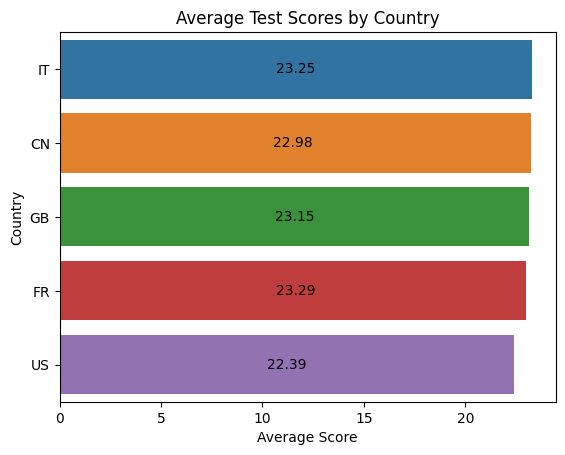

In [ ]:
# Calculate the average test score for each country
avg_scores = df.groupby('Country')['Score'].mean()
print("\nAverage score per country:\n", avg_scores)


import seaborn as sns

# Convert avg_scores to DataFrame and sort it by Score
avg_scores_df = avg_scores.reset_index()
avg_scores_df_sorted = avg_scores_df.sort_values(by='Score', ascending=False)

barplot = sns.barplot(x='Score', y='Country', data=avg_scores_df_sorted)
plt.title('Average Test Scores by Country')
plt.ylabel('Country')
plt.xlabel('Average Score')

# Annotate each bar with the corresponding average score
for index, row in avg_scores_df_sorted.iterrows():
    barplot.text(row.Score/2, index, round(row.Score, 2), color='black', ha="center", va="center")

plt.show()

###Visualize Country Scores

####Plot a histogram showing the distribution of scores for each of the five countries

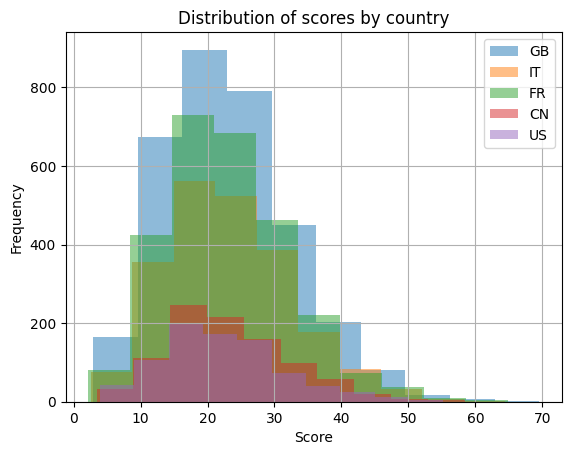

In [ ]:
# Histogram of scores for each country
for country in df['Country'].unique():
    df[df['Country'] == country]['Score'].hist(bins=10, alpha=0.5)
plt.legend(df['Country'].unique())
plt.title('Distribution of scores by country')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

####Show the average score per country using color gradations.

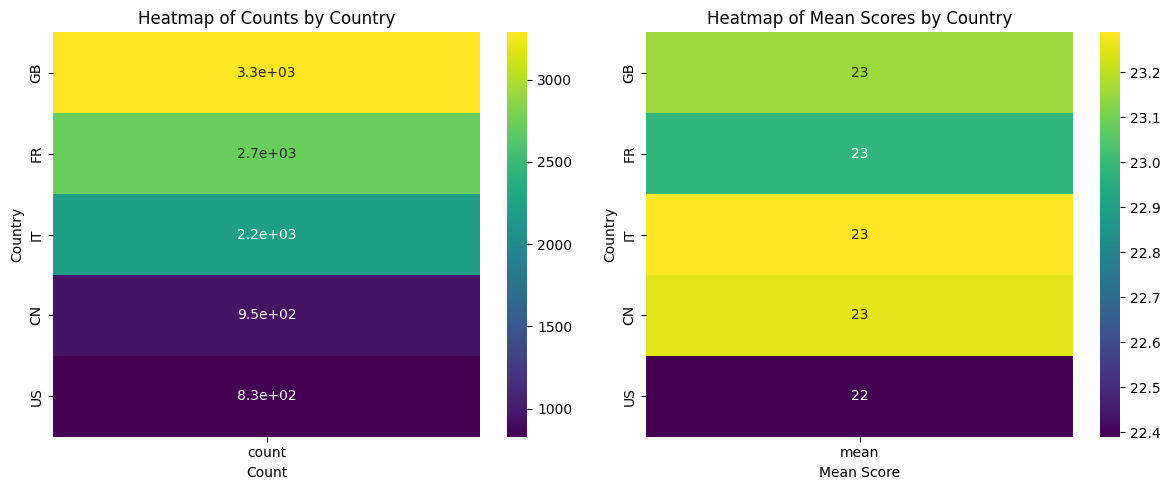

In [ ]:
# Summary table for average score and count
summary_table = df.groupby('Country')['Score'].agg(['count', 'mean']).sort_values("count", ascending = False)

# Creating a figure with two subplots (heatmaps), side by side
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Plotting the first heatmap which shows the counts of scores by country
sns.heatmap(summary_table[["count"]], annot=True, cmap='viridis', ax=axs[0])
axs[0].set_title("Heatmap of Counts by Country")
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Country")

# Plotting the second heatmap which shows the average scores by country
sns.heatmap(summary_table[["mean"]], annot=True, cmap='viridis', ax=axs[1])
axs[1].set_title("Heatmap of Mean Scores by Country")
axs[1].set_xlabel("Mean Score")
axs[1].set_ylabel("Country")

# Adjusting the subplots to fit into the figure area
plt.tight_layout()

# Displaying the figure with two heatmaps
plt.show()

####Generate a boxplot showing AI research scores by country and annotates each box with the number of data points for that country

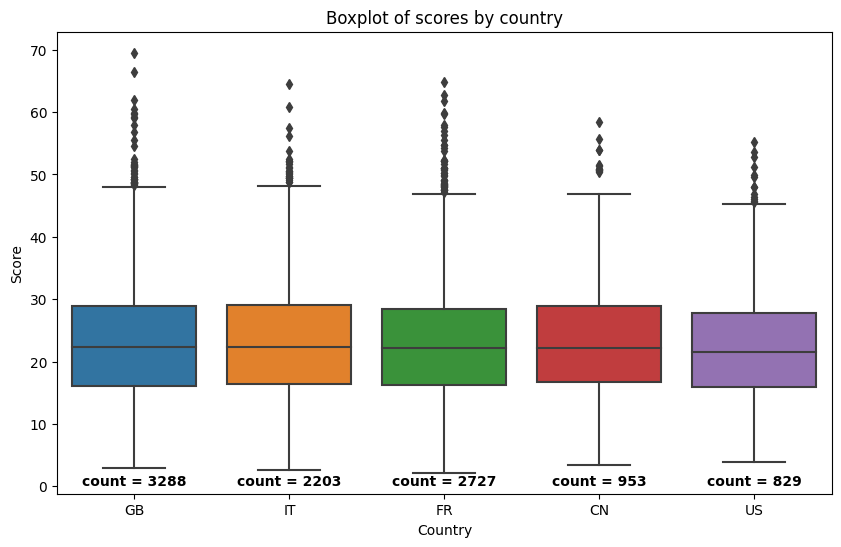

In [ ]:
# @title
# Boxplot of scores for each country
plt.figure(figsize=(10,6))
box_plot = sns.boxplot(x='Country', y='Score', data=df)
plt.title('Boxplot of scores by country')
plt.xlabel('Country')
plt.ylabel('Score')
# Get the counts for each country
counts = df['Country'].value_counts().to_dict()
# Annotate the boxplot with the counts
for i, country in enumerate(df['Country'].unique()):
  count = counts[country]
# Add a negative offset to the y-coordinate to position the text below the whisker
  offset = -2
  box_plot.text(i, df['Score'].min() + offset, f'count = {count}',
                horizontalalignment='center', color='black',
                weight='semibold')
plt.show()